In [2]:
import mne

In [4]:
raw=mne.io.read_raw_fif('/home/cfadmin/Documents/cfstorage/cfprojects/CConsciente/media/sample_audvis_filt-0-40_raw.fif')
raw.info

Opening raw data file /home/cfadmin/Documents/cfstorage/cfprojects/CConsciente/media/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 GRAD, 102 MAG, 9 STIM, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

In [29]:
channels=['EEG 016','EEG 017']
raw_eeg=raw.copy().pick_types(eeg=True)
raw_eeg.load_data()
channels_idxs=mne.pick_channels(raw_eeg.info['ch_names'], include=channels)
raw_notch=raw_eeg.notch_filter(freqs=(25), method='fir',picks=channels_idxs)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Setting up band-stop filter from 24 - 26 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 24.44, 25.56 Hz: -6.02, -6.02 dB



In [30]:
raw_notch.save('src/cconsciente/processes-temp/output_raw.fif', overwrite=True)

Overwriting existing file.
Writing /home/cfadmin/Documents/cfstorage/cfprojects/CConsciente/backend/src/cconsciente/processes-temp/output_raw.fif
Closing /home/cfadmin/Documents/cfstorage/cfprojects/CConsciente/backend/src/cconsciente/processes-temp/output_raw.fif
[done]


In [4]:
raw_test=mne.io.read_raw_fif('src/cconsciente/processes-temp/anon_NOTCH_SPZoVM84agAniWx32dXQrQ_raw.fif')
raw_test.info

Opening raw data file src/cconsciente/processes-temp/anon_NOTCH_SPZoVM84agAniWx32dXQrQ_raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


<Info | 14 non-empty values
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>

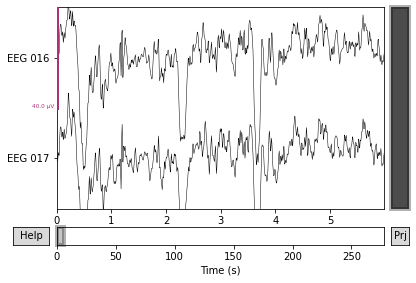

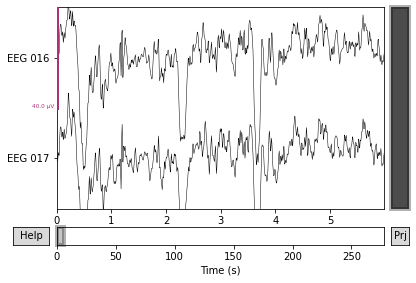

In [7]:
channels=['EEG 016','EEG 017']
channels_idxs=mne.pick_channels(raw_test.info['ch_names'], include=channels)
raw_test.plot(order=channels_idxs, start=0, duration=6)

Effective window size : 13.639 (s)


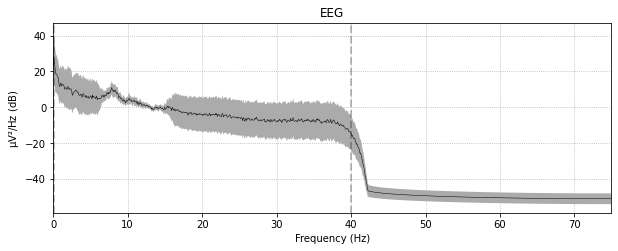

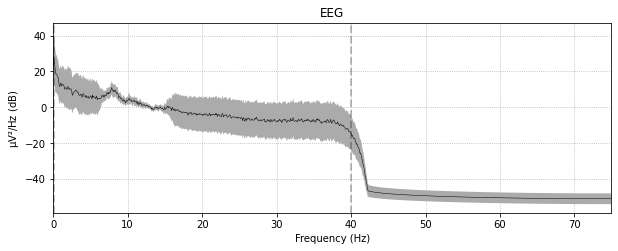

In [8]:
raw_test.plot_psd(fmax=75, average=True)